# Métodos Númericos e o Scipy

In [7]:
import numpy as np
import matplotlib.pyplot as plt

A biblioteca SciPy oferece uma ampla gama de funcionalidades para computação científica, implementadas de maneira eficiente, como integração numérica, interpolação, otimização e álgebra linear.

O Scipy consiste em um conjunto de algoritmos numéricos com interfaces em Python. Essas interfaces costumam funcionar como "envoltórios" de bibliotecas numéricas amplamente usadas, desenvolvidas pela comunidade e que também podem ser utilizadas em outras linguagens de programação.

Em geral, há documentação detalhada disponível para esclarecer como cada implementação funciona, todavia uma documentação geral pode ser encontrada em [docs.scipy.org/doc](https://docs.scipy.org/doc/).


O Scipy oferece vários subpacotes; usualmente, você os importa de forma individual, como no exemplo:

In [ ]:
from scipy import linalg, optimize

Dessa maneira, você tem acesso às funções e métodos presentes nesses módulos.

É importante ter em mente que todos os métodos numéricos possuem suas vantagens e limitações, além de se basearem em suposições. Portanto, é essencial **sempre** pesquisar sobre o método utilizado para entender como ele funciona.

Além disso, testar um novo método em um problema onde a resposta é conhecida é uma prática recomendada, para verificar se o método está funcionando corretamente.

O SciPy oferece uma vasta gama de funcionalidades. Neste material, explorarei os seguintes módulos:

1. `integrate`: Funções para cálculo de integrais e soluções de equações diferenciais ordinárias.
2. `interpolate`: Técnicas de interpolação.
3. `optimize`: Métodos de otimização e funções para encontrar raízes.

## Integração

Vamos realizar algumas integrais do tipo

$$I = \int_a^b f(x) dx$$

Podemos considerar duas situações possíveis:
* Quando a função $f(x)$ é expressa por uma fórmula analítica. Nesse caso, temos a flexibilidade de escolher os pontos de integração, o que geralmente nos permite otimizar os resultados e alcançar alta precisão.
* Quando a função $f(x)$ é definida em um conjunto de pontos (que podem ser espaçados de maneira regular).

Na análise numérica, o termo _quadratura_ refere-se a qualquer método de integração que expressa a integral como a soma ponderada de um número finito de pontos.

Com isso em mente, o módulo `integrate` disponibiliza várias funções para o cálculo de integrais. A principal delas é a função `quad`, que possibilita o cálculo de uma integral definida de uma variável, utilizando precisamente técnicas de quadratura. Ela retorna o valor da integral junto com uma estimativa do erro.




In [2]:
from scipy import integrate
#help(integrate)

Como exemplo, vamos calcular a integral

$$I = \int_0^{2\pi} \sin^2(x) dx$$

In [5]:
def f(x):
    return np.sin(x)**2

In [8]:
I, err = integrate.quad(f, 0.0, 2.0*np.pi)
print('resultado: {}, erro: {}'.format(I, err))

resultado: 3.141592653589793, erro: 2.3058791671639882e-09


Podemos usar a função `help` para compreende-lá melhor

In [6]:
#help(integrate.quad)

### Argumentos adicionais

Em alguns casos, nossa função integranda pode receber argumentos opcionais. Vamos considerar a integral da função Gausssiana

$$g(x) = A e^{-(x/\sigma)^2}$$


Agora, queremos poder definir a amplitude, $A$, e a largura, $\sigma$, diretamente na função.

In [7]:
def g(x, A, sigma):
    return A*np.exp(-x**2/sigma**2)

In [8]:
I, err = integrate.quad(g, -1.0, 1.0, args=(1.0, 2.0))
print(I, err)

1.8451240256511698 2.0484991765669867e-14


### Integração até o infinito

O Numpy define o valor `inf`, que pode ser utilizado nos limites de integração. Por exemplo, podemos integrar uma função Gaussiana 

$$g(x) = A e^{-(x/\sigma)^2}$$

no intervalo $[-\infty, \infty]$ (sabemos que o resultado é $\sqrt{\pi}$).

In [9]:
I, err = integrate.quad(g, -np.inf, np.inf, args=(1.0, 1.0))
print(I, err)
print(np.pi**0.5)
print(abs(I-np.pi**0.5)) #Remember 0 in a computer always means "0 within machine epsilon"

1.7724538509055159 1.4202637059452923e-08
1.7724538509055159
0.0


### Multidimensional integrals

A integração multidimensional pode ser realizada com chamadas sucessivas à função `quad()`, mas existem módulos que facilitam esse processo. Um dos módulos mais úteis para integrais duplas é a função `dblquad`

Observe a forma da função:

```
dblquad(f, a, b, xlo, xhi)
```

onde:
- $f$ é a função que será integrada, expressa como $f(y, x)$. É importante notar que, no caso da função `dblquad`, **o argumento $y$ vem primeiro**, e o $x$ é integrado em relação ao segundo.
-  $a$ e $b$ são os valores de integração para $y$
- para cada valor de $y$, o limite inferior de integração de $x$ é dado pela função `xlo(y)`, e o limite superior é dado pela função `xhi(y)`.

Vamos calcular

$$I = \int_{y=0}^{1/2} \int_{x=0}^{1-2y} xy \, dx \, dy = \frac{1}{96}$$

Note que os limites de integração em $x$ dependem de $y$.

A integral será de: $y = [0, 1/2]$, e $x$ variando entre $x_{inicial}$ = `xlo(y)`, $x_{final}$ = `xhi(y)`

Isso significa que para cada valor de y, a integral de x será calculada dentro do intervalo determinado por essas funções.

In [10]:
def integrand(y, x):
    return x*y

def x_lower_lim(y):
    return 0
    
def x_upper_lim(y):
    return 1-2*y

# we change the definitions of x and y in this call
I, err = integrate.dblquad(integrand, 0.0, 0.5, x_lower_lim, x_upper_lim)
print(I, err)


0.010416666666666668 4.1016201284723663e-16


Se você se lembra das funções lambda em Python (funções de uso único), pode fazer isso de maneira mais compacta:

In [11]:
I, err = integrate.dblquad(lambda x, y: x*y, 0.0, 0.5, lambda y: 0, lambda y: 1-2*y)
print(I)

0.010416666666666668


### Integração de uma função amostrada

Em algumas situações, como em experimentos, a função que estamos tentando integrar pode não estar disponível em uma forma analítica, mas apenas como um conjunto de dados amostrados. Nestes casos, precisamos calcular a integral com base em uma sequência de pontos discretos. Assim, vamos calcular a integral

$$I = \int_0^{2\pi} f(x_i) \, dx$$

onde os pontos $x_i$ são dados por $x_i = 0, \ldots, 2\pi$, definidos em $N$ pontos discretos.

Há diversas maneiras de se integrar funções definidas por pontos. No caso de amostras com espaçamento arbitrário, as duas funções mais famosas são `trapezoid` e `simpson`. Elas utilizam as fórmulas de Newton-Cotes de ordem 1 e 2, respectivamente, para realizar a integração. A regra dos trapézios aproxima a função como uma linha reta entre pontos adjacentes, enquanto a regra de Simpson aproxima a função entre três pontos adjacentes como uma parábola.

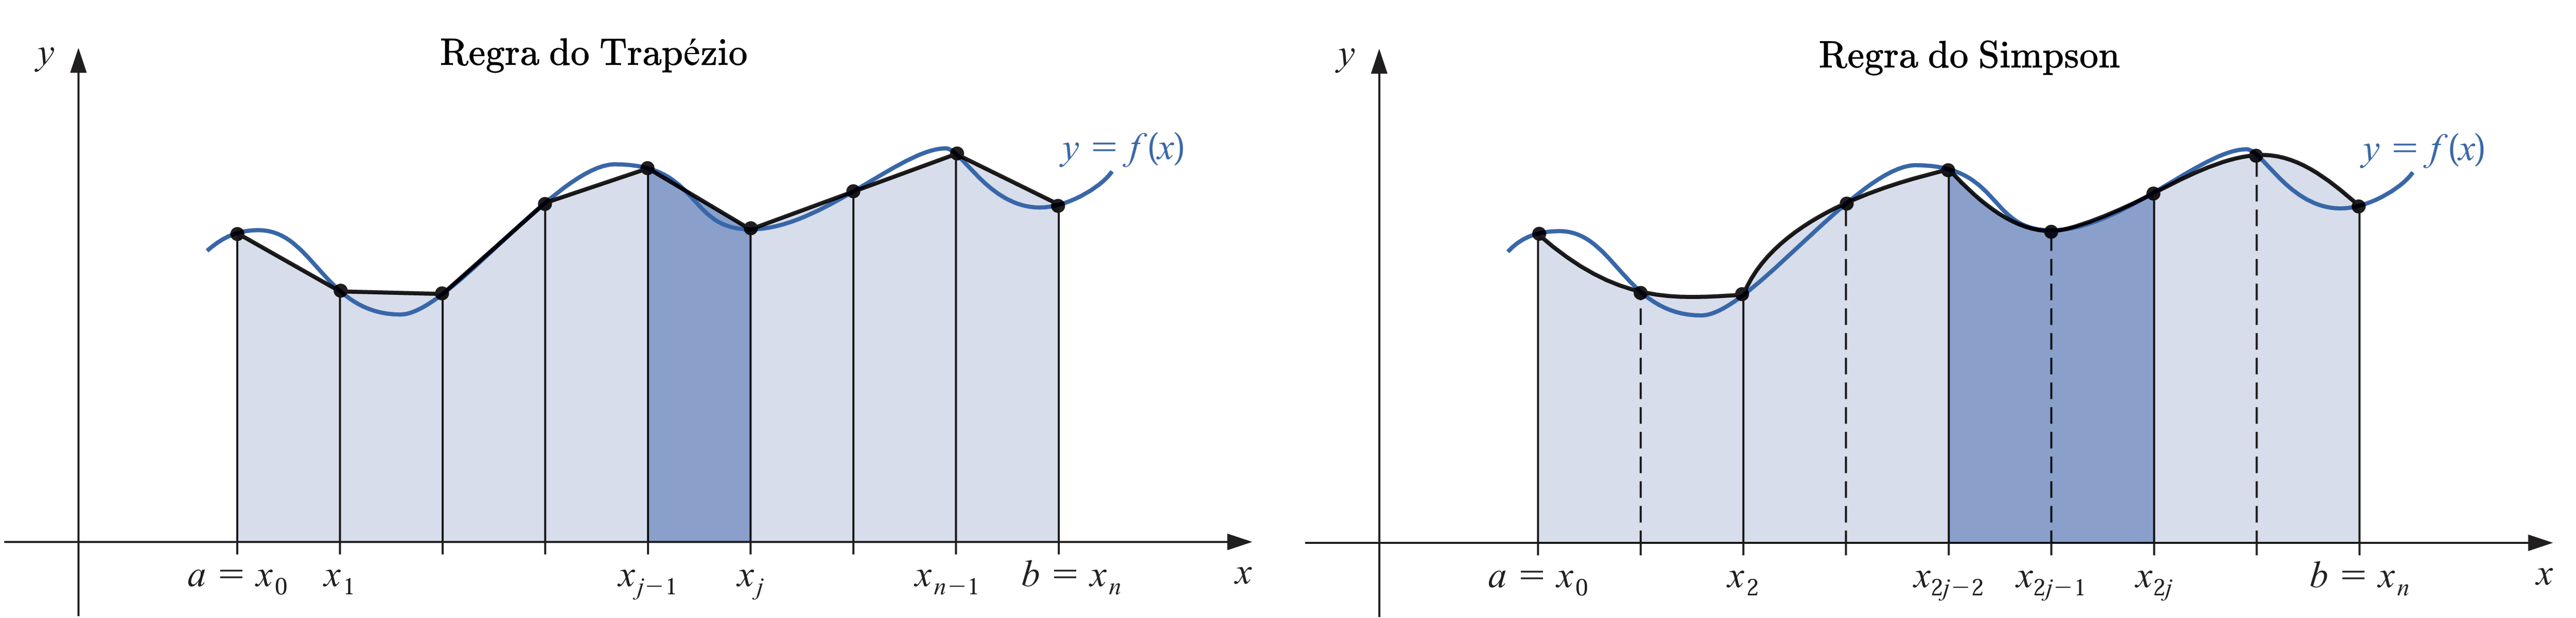


In [13]:
N = 17
x = np.linspace(0.0, 2.0*np.pi, N, endpoint=True)
y = np.sin(x)**2

I = integrate.trapezoid(y, x)
print(I)

3.141592653589793


In [14]:
N = 17
x = np.linspace(0.0, 2.0*np.pi, N, endpoint=True)
y = np.sin(x)**2

I = integrate.simps(y, x)
print(I)

3.141592653589793


## Interpolação

A interpolação é uma técnica utilizada para estimar valores de uma função em pontos que não estão diretamente disponíveis, preenchendo as lacunas entre um conjunto discreto de pontos. Essa técnica assume um modelo ou comportamento para os dados entre os pontos amostrados. 

Existem diversos tipos de interpolação, cada um com características distintas:
* Alguns métodos garantem que não serão introduzidos novos extremos (pontos de máximo ou mínimo) durante a interpolação.
* Outros preservam a quantidade sendo interpolada, como a área ou o volume, ao longo do intervalo.
* Há também métodos que asseguram que a derivada da função seja contínua nos pontos finais, garantindo uma transição suave.

Para ver a lista completa acesse a documentação: https://scipy.github.io/devdocs/tutorial/interpolate.html

É importante destacar que, apesar de ser útil em muitas situações, a interpolação pode apresentar problemas, como no caso do uso de polinômios de alta ordem, que podem levar a resultados imprecisos ou indesejados, como oscilações excessivas entre os pontos de dados.


A função `interp1d()` permite uma variedade de métodos de interpolação unidimensional. Ela retorna um objeto que se comporta como uma função, que pode ser avaliada em qualquer ponto desejado.

In [19]:
import scipy.interpolate as interpolate

In [15]:
#help(interpolate.interp1d)

Como um exemplo, vamos considerar a função

$$f(x) = x \sin(x)$$

para gerar um conjunto de pontos e depois interpolar tal conjunto de dados.

Vamos começar gerando esse conjunto e plotando ele juntamente com a função exata

In [60]:
def f_exact(x):
    return np.sin(x)*x

In [61]:
N = 10
x = np.linspace(0, 20, N)

y = f_exact(x)

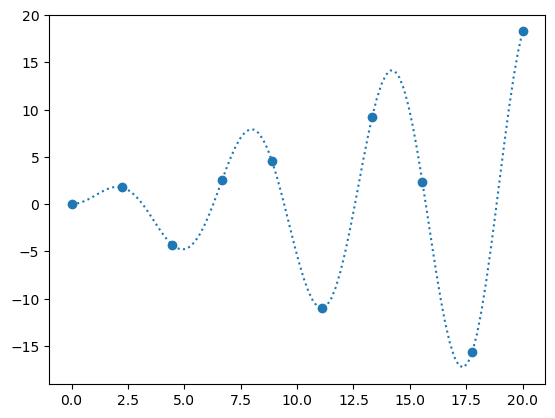

In [63]:
fig, ax = plt.subplots()

x_fine = np.linspace(0, 20, 10*N)

ax.scatter(x, y)
ax.plot(x_fine, f_exact(x_fine), ls=":", label="função original")

A interpolação de dados unidimensionais pode ser feita usando a função `interp1d` da biblioteca `scipy.interpolate`. Essa função cria uma interpoladora para estimar valores de `y` para novos pontos de `x`, com base em dados fornecidos.

A sintaxe básica é:

```python
f_interp = interpolate.interp1d(x, y, kind="cubic")
```

Onde:
- `x` e `y` são os arrays de dados conhecidos.
- `kind` define o tipo de interpolação. Basecimamente, os três tipos mais usados são:
  - `"linear"`: Realiza uma interpolação linear, ou seja, conecta os pontos com segmentos de reta, criando uma transição direta e sem curvas.
  - `"quadratic"`: Utiliza uma interpolação quadrática, ajustando um polinômio de grau 2 para passar pelos pontos, criando uma curva suave, mas com menor flexibilidade que a cúbica.
  - `"cubic"`: Utiliza uma interpolação cúbica, que ajusta um polinômio de grau 3 para garantir uma transição suave entre os pontos.
- `f_interp` é a função gerada, que pode ser usada para calcular valores interpolados para novos pontos de `x`.



In [51]:
f_interp_linear = interpolate.interp1d(x, y, kind="linear")
f_interp_quadratic = interpolate.interp1d(x, y, kind="quadratic")
f_interp_cubic = interpolate.interp1d(x, y, kind="cubic")

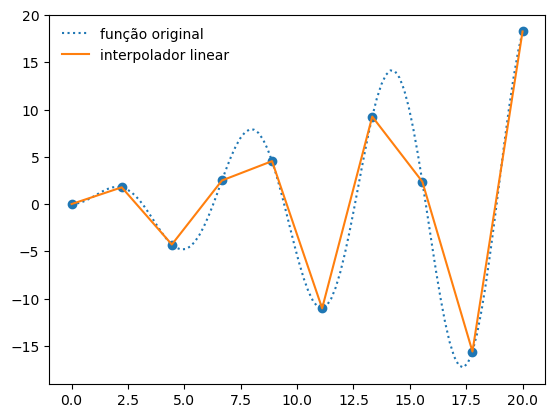

In [52]:
ax.plot(x_fine, f_interp_linear(x_fine), label="interpolador linear")

ax.legend(frameon=False, loc="best")
fig

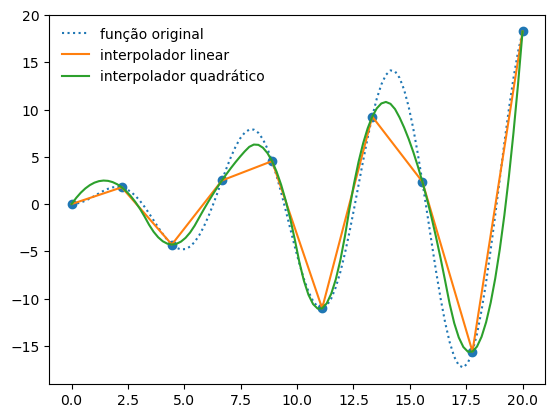

In [53]:
ax.plot(x_fine, f_interp_quadratic(x_fine), label="interpolador quadrático")

ax.legend(frameon=False, loc="best")
fig

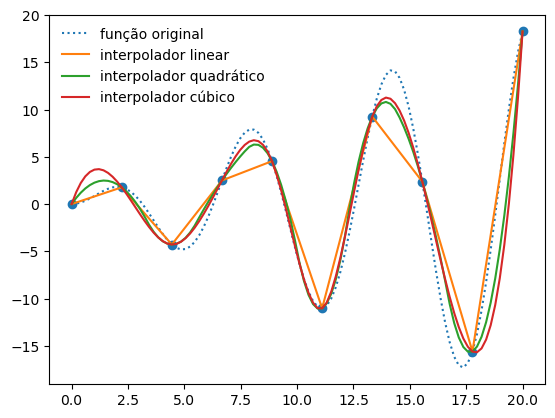

In [54]:
ax.plot(x_fine, f_interp_cubic(x_fine), label="interpolador cúbico")

ax.legend(frameon=False, loc="best")
fig

Observe que o interpolador retorna uma função, assim caso desejamos saber qual o valor que esse interpolador irá retornar num valor arbitrário de $x_0$, basta aplicar `f_interp(x_0)`

In [56]:
print(f_interp_linear(5))
print(f_interp_quadratic(5))
print(f_interp_cubic(5))

-2.590805005477228
-3.6967977411255415
-3.7264323211400803


## Encontrando Raízes

Em muitos problemas numéricos, é comum precisarmos determinar o valor de uma variável que faça com que uma função se anule, ou seja, encontrar a raiz da função. 

A biblioteca `scipy.optimize` contém  vários métodos para encontrar raízes, entretanto a rotina `brentq()` oferece um método robusto e eficiente para encontrar raízes de uma função escalar. 

Para utilizá-la, é necessário fornecer um intervalo no qual se sabe que a função muda de sinal, delimitando a região em que a raiz está localizada. O método então irá iterativamente refiná-la até atingir a solução com a precisão desejada.

Vamos considerar para ilustrar a rotina a função

$f(x) = \frac{x e^x}{e^x - 1} - 5$

In [67]:
import scipy.optimize as optimize

In [31]:
def f(x):
    return (x*np.exp(x)/(np.exp(x) - 1.0) - 5.0)

In [32]:
root, r = optimize.brentq(f, 0.1, 10.0, full_output=True)

print(root)
print(r.converged)

4.965114231744287
True


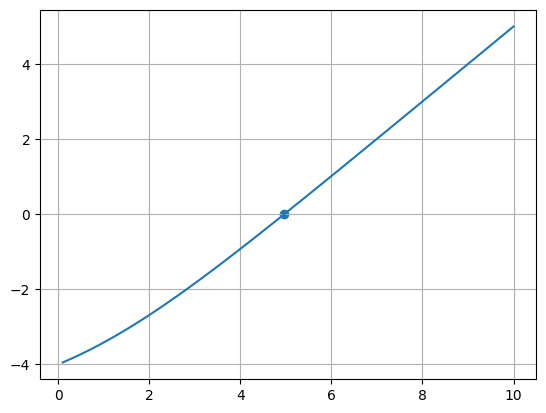

In [33]:
x = np.linspace(0.1, 10.0, 1000)
fig, ax = plt.subplots()
ax.plot(x, f(x))
ax.scatter(np.array([root]), np.array([f(root)]))
ax.grid()

## Ajuste de Curvas

O método de mínimos quadrados é uma técnica amplamente utilizada para ajustar um modelo aos dados experimentais, minimizando a soma dos quadrados dos resíduos 


O resíduo quantifica a diferença entre o valor observado $y_i$ e o valor previsto pela função $Y(x_i, \{a_j\})$:

$$\Delta_i = Y(x_i, \{a_j\}) - y_i$$

O objetivo é ajustar os parâmetros do modelo $a_j$ para que a soma dos quadrados dos resíduos seja a menor possível, ou seja minimizar

$$\sum_{i=1}^N (\Delta_i)^2 = \sum_{i=1}^N (Y(x_i, \{a_j\}) - y_i)^2


No `Scipy`, podemos usar a função `scipy.optimize.leastsq()` para resolver problemas de ajuste por mínimos quadrados.

### Sintaxe Básica

```python
scipy.optimize.leastsq(func, x0, args=())
```

- **func**: Função que calcula o resíduo. Ela recebe um conjunto de parâmetros do modelo e retorna o vetor de resíduos.
- **x0**: Estimativa inicial para os parâmetros a serem otimizados.
- **args**: Argumentos adicionais passados para a função func.

Observe que é a função resíduo que aparece como argumento do `scipy.optmize`

A função retorna dois valores:

- O primeiro argumento consiste nos **Parâmetros otimizado**, ou seja, os valores dos parâmetros do modelo que minimizam a soma dos quadrados dos resíduos.
- O segundo valor retornado retorna um código de término que pode ser interpretado da seguinte maneira:
    - **1** $\rightarrow$ Convergência bem-sucedida, ou seja, a função encontrou uma solução ótima e o processo de otimização terminou corretamente.
    - **2** $\rightarrow$ A solução não convergiu, mas o número máximo de iterações foi alcançado.
    - **3** $\rightarrow$ A solução não convergiu e ocorreu um erro devido a uma falta de progressão significativa entre iterações sucessivas.
    - **4** $\rightarrow$ Outro tipo de erro ou falha no processo de otimização.

Vamos ilustrar a aplicação com um exemplo, primeiro vamos exibir uma série de pontos e fazer o gráfico deles

In [75]:
import scipy.optimize as opt

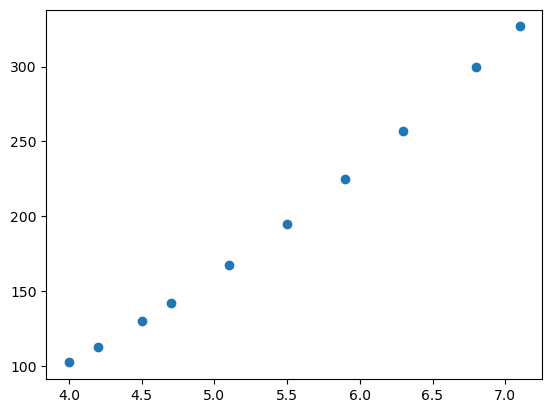

In [79]:
x = np.array([4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1])
y = np.array([102.56, 113.18, 130.11, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72])

fig, ax = plt.subplots()
ax.scatter(x,y)

Vamos agora definir a função que descreve o modelo bem como a função resíduo (vamos considerar que a função é ajustada por um polinômio de ordem 2)

In [80]:
# Função de modelo (quadrática)
def modelo(params, x):
    a, b, c = params
    return a * x**2 + b * x + c

# Função de resíduo
def resido(params, x, y):
    return modelo(params, x) - y

In [88]:
# Usando o método dos mínimos quadrados para otimizar os parâmetros
a_fit, flag = opt.leastsq(resido, [1,1,1], args=(x, y))

Observe que a função `.leastsq`retorna dois valores, o primeiro sendo os parametros ajustados e o segundo uma flag sobre a convergência do método

In [89]:
print(a_fit)
print(flag)

[ 6.61821096 -1.14352388  1.23556172]
1


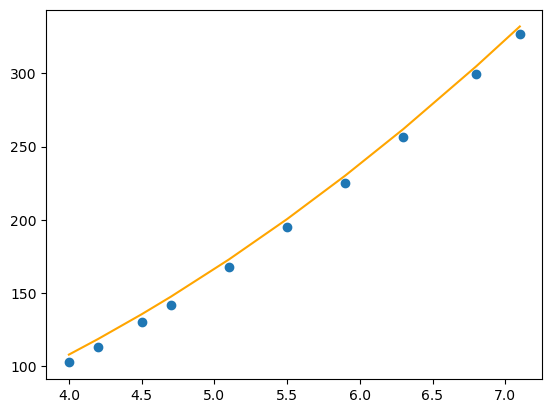

In [90]:
fig, ax = plt.subplots()

ax.scatter(x,y)
ax.plot(x, a_fit[0]*x*x + a_fit[1]*x +  a_fit[0], color = 'orange' )

Vamos considerar outro exemplo agora, onde a função que iremos ajustar que iremos utilizar é do tipo não linear

$$ f(x) = a_0 e^{-a_1 x}$$

onde os dados estão descrito abaixos:

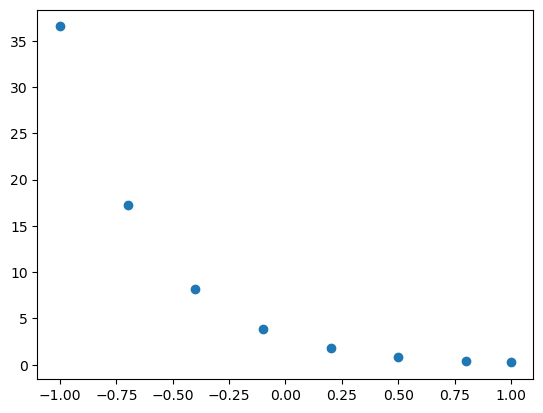

In [106]:
x = np.array([-1.0, -0.7, -0.4, -0.1, 0.2, 0.5, 0.8, 1.0])
y = np.array([36.547, 17.264, 8.155, 3.852, 1.820, 0.860, 0.406, 0.246])

fig, ax = plt.subplots()
ax.scatter(x,y)

Definindo as funções do modelo e residuo temos

In [117]:
# Função de modelo (não linear)
def modelo(params, x):
    a0, a1 = params
    return a0 * np.exp(- a1 * x)

# Função de resíduo
def resido(params, x, y):
    return modelo(params, x) - y

Assim, utilizando `.leastsq`, obtemos os parametros que melhores ajustam e a flag.

In [125]:
a0, a1 = 1, 1
a_fit, flag = optimize.leastsq(resido, [a0, a1], args=(x, y))

print(flag)
print(a_fit)

3
[3.00016682 2.49993136]


```{important}

O código 3 indica que a otimização não convergiu completamente, geralmente devido à falta de progresso significativo nas iterações. Isso pode ocorrer por um chute inicial inadequado, modelo mal condicionado ou dados insuficientes. No entanto, é possível obter um bom ajuste mesmo com esse código, pois o modelo pode já estar minimizando adequadamente o resíduo, embora o algoritmo não tenha convergido de maneira ideal. É importante avaliar o ajuste visualmente e verificar se os parâmetros ajustados são razoáveis para o problema.

```

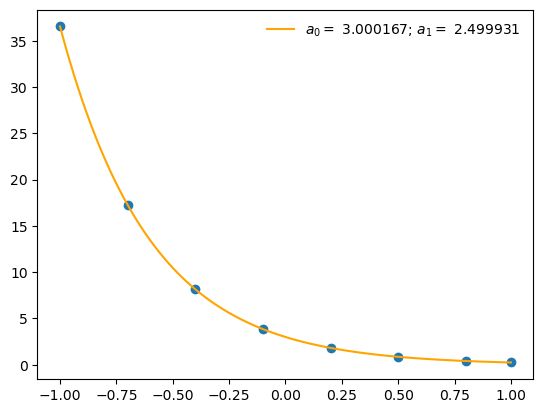

In [126]:
fig, ax = plt.subplots()

xx = np.linspace(-1,1,100)

ax.plot(xx, a_fit[0]*np.exp(- a_fit[1]*xx),
           label=r"$a_0 = $ %f; $a_1 = $ %f" % (a_fit[0], a_fit[1]),
           color = 'orange')

ax.scatter(x,y)

ax.legend(numpoints=1, frameon=False)

## ODEs

Many methods exist for integrating ordinary differential equations.  Most will want you to write your ODEs as a system of first-order equations.

This system of ODEs is the [Lorenz system](https://en.wikipedia.org/wiki/Lorenz_system), which is used in atmosphere modeling and has funny mathematical properties (chaos!).

$$\frac{dx}{dt} = \sigma (y - x)$$
$$\frac{dy}{dt} = rx - y - xz$$
$$\frac{dz}{dt} = xy - bz$$

The steady states of this system correspond to:

$${\bf f}({\bf x}) = 
\left (
\sigma (y -x), 
rx - y -xz, 
xy - bz
\right )^\intercal
= 0$$


In [ ]:
# system parameters
sigma = 10.0
b = 8./3.
r = 28.0

def rhs(t, x):
    xdot = sigma*(x[1] - x[0])
    ydot = r*x[0] - x[1] - x[0]*x[2]
    zdot = x[0]*x[1] - b*x[2]

    return np.array([xdot, ydot, zdot])

def jac(t, x):

    return np.array(
        [ [-sigma, sigma, 0.0], 
          [r - x[2], -1.0, -x[0]],
          [x[1], x[0], -b] ])

def f(x):
    return rhs(0.,x), jac(0.,x)

Scipy has a uniform interface to the different ODE solvers, `solve_ivp()` -- we use that here (though for a specific ODE in [this python library](https://github.com/dgerosa/precession) I wrote for black-hole physics, I empirically found that the older implementation `scipy.integrate.odeint` actually worked better).  

Note, some (but not all) solvers provide a way to get the solution data at intermediate times (called dense output).

In [ ]:
def ode_integrate(X0, dt, tmax):
    """ integrate using the VODE method, storing the solution each dt """

    r = integrate.solve_ivp(rhs, (0.0, tmax), X0,
                            method="RK45", dense_output=True)

    # get the solution at intermediate times
    ts = np.arange(0.0, tmax, dt)
    
    Xs = r.sol(ts)
    return ts, Xs

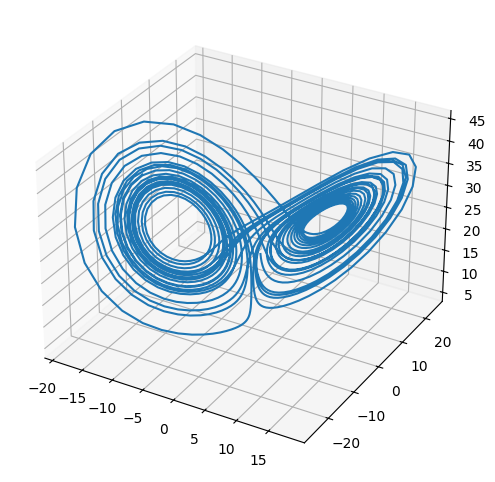

In [ ]:
t, X = ode_integrate([1.0, 1.0, 20.0], 0.02, 30)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(X[0,:], X[1,:], X[2,:])
fig.set_size_inches(8.0,6.0)

### Multi-variate root find

We can find the steady points in this system by doing a multi-variate root find on the RHS vector

In [ ]:
sol1 = optimize.root(f, [1., 1., 1.], jac=True)
print(sol1.x)

sol2 = optimize.root(f, [10., 10., 10.], jac=True)
print(sol2.x)

sol3 = optimize.root(f, [-10., -10., -10.], jac=True)
print(sol3.x)

[0. 0. 0.]
[ 8.48528137  8.48528137 27.        ]
[-8.48528137 -8.48528137 27.        ]


Text(0.5, 0, 'z')

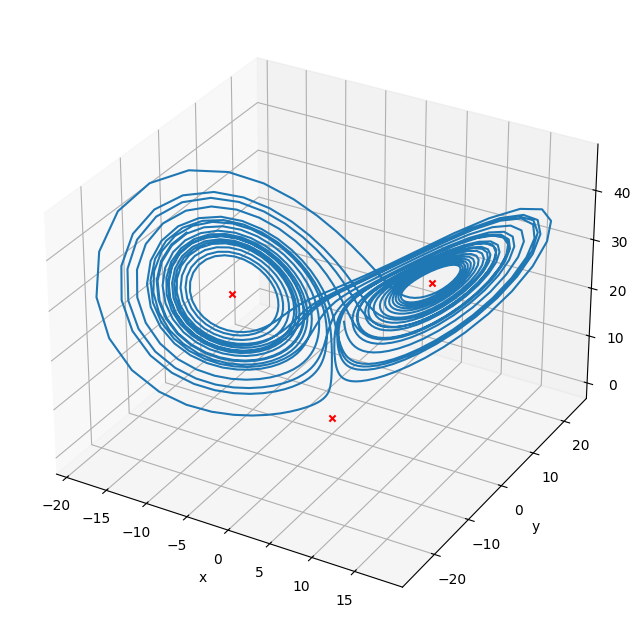

In [ ]:
fig = plt.figure()
fig.set_size_inches(8, 8)
ax = plt.axes(projection='3d')

ax.plot(X[0,:], X[1,:], X[2,:])

ax.scatter(sol1.x[0], sol1.x[1], sol1.x[2], marker="x", color="r")
ax.scatter(sol2.x[0], sol2.x[1], sol2.x[2], marker="x", color="r")
ax.scatter(sol3.x[0], sol3.x[1], sol3.x[2], marker="x", color="r")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

### Stiff system of ODEs

A [stiff system of ODEs](https://en.wikipedia.org/wiki/Stiff_equation) is one where there are multiple disparate timescales for change and we need to respect all of them to get an accurate solution

Here is an example that comes up when studying the rates of chemical reactions (see, ex. Byrne & Hindmarsh 1986, or the VODE source code)

$$
\frac{d}{dt} \left (
   \begin{array}{c} y_1 \newline y_2 \newline y_3 \end{array}
  \right ) =
%
\left (
 \begin{array}{rrr}
  -0.04 y_1 & + 10^4 y_2 y_3  & \newline
   0.04 y_1 & - 10^4 y_2 y_3 & -3\times 10^7 y_2^2 \newline
   &  & 3\times 10^7 y_2^2 
\end{array}
\right )
$$

$$
{\bf J} = \left (
\begin{array}{ccc}
  -0.04 & 10^4 y_3 & 10^4 y_2 \newline
   0.04 & -10^4 y_3 - 6\times 10^7 y_2 & -10^4 y_2 \newline
   0 & 6\times 10^7 y_2 & 0 
\end{array}
\right )
$$

start with $y_1(0) = 1, y_2(0) = y_3(0) = 0$.  Long term behavior is $y_1, y_2 \rightarrow 0; y_3 \rightarrow 1$. Notice how we have terms that differ by several orders of magnitudes! A computer doesn't like it.

Using [LSODA](https://www.osti.gov/etdeweb/biblio/21352532) here, which is a powerful algorithm with automatic stiffness detection.

In [ ]:
def rhs(t, Y):
    """ RHS of the system -- using 0-based indexing """
    y1 = Y[0]
    y2 = Y[1]
    y3 = Y[2]

    dy1dt = -0.04*y1 + 1.e4*y2*y3
    dy2dt =  0.04*y1 - 1.e4*y2*y3 - 3.e7*y2**2
    dy3dt =                         3.e7*y2**2

    return np.array([dy1dt, dy2dt, dy3dt])

def jac(t, Y):
    """ J_{i,j} = df_i/dy_j """

    y1 = Y[0]
    y2 = Y[1]
    y3 = Y[2]

    df1dy1 = -0.04
    df1dy2 = 1.e4*y3
    df1dy3 = 1.e4*y2

    df2dy1 = 0.04
    df2dy2 = -1.e4*y3 - 6.e7*y2
    df2dy3 = -1.e4*y2

    df3dy1 = 0.0
    df3dy2 = 6.e7*y2
    df3dy3 = 0.0

    return np.array([ [ df1dy1, df1dy2, df1dy3 ],
                      [ df2dy1, df2dy2, df2dy3 ],
                      [ df3dy1, df3dy2, df3dy3 ] ])

In [ ]:
def vode_integrate(Y0, tmax):
    """ integrate using the NDF method """

    r = integrate.solve_ivp(rhs, (0.0, tmax), Y0,
                            method="LSODA", jac=jac, rtol=1.e-7, atol=1.e-10)

    # Note: this solver does not have a dens_output method, instead we 
    # access the solution data where it was evaluated internally via
    # the return object
    
    return r.t, r.y

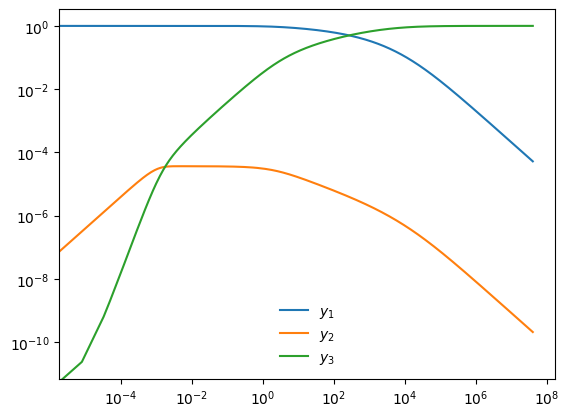

In [ ]:
Y0 = np.array([1.0, 0.0, 0.0])
tmax = 4.e7

ts, Ys = vode_integrate(Y0, tmax)

ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

plt.plot(ts, Ys[0,:], label=r"$y_1$")
plt.plot(ts, Ys[1,:], label=r"$y_2$")
plt.plot(ts, Ys[2,:], label=r"$y_3$")

plt.legend(loc="best", frameon=False)

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Exercises

For the exam, please complete two of these exercise (don't pick both Q1 and Q2, too easy)

## Q1: Simple numerical integral

Numerical integration methods work differently depending on whether you have the analytic function available (in which case you can evaluate it freely at any point you please) or if it is sampled for you.

Consider the function $f(x) = e^{-x^2}$.  We want to integrate this from $[-5, 5]$.  The
analytic integral is not easily obtained.  Use `integrate.quad` to do the integration.

Consider now that you have data that represents a function sampled a `N` points, but you don't know the analytic form of the function.  Here, we create the sampling from a uniform distribution

In [95]:
N = 32
x = np.linspace(-5, 5, N)
f = np.exp(-x**2)
f

array([1.38879439e-11, 3.15061953e-10, 5.80457065e-09, 8.68481106e-08,
       1.05527775e-06, 1.04133225e-05, 8.34503173e-05, 5.43103745e-04,
       2.87047478e-03, 1.23208538e-02, 4.29481052e-02, 1.21580337e-01,
       2.79510942e-01, 5.21855680e-01, 7.91258065e-01, 9.74320895e-01,
       9.74320895e-01, 7.91258065e-01, 5.21855680e-01, 2.79510942e-01,
       1.21580337e-01, 4.29481052e-02, 1.23208538e-02, 2.87047478e-03,
       5.43103745e-04, 8.34503173e-05, 1.04133225e-05, 1.05527775e-06,
       8.68481106e-08, 5.80457065e-09, 3.15061953e-10, 1.38879439e-11])

Compute the integral of this sampled function using Simpson's method (`integrate.simps`).  Now, vary the number of sample points (try 64, 128, ...) and see how the answer changes.  Simpson's method is 4-th order accurate, which means that the error should decrease by $2^4$ when we double the number of sample points.

Make a plot of the error (compared to the quadrature result) vs. N

## Q2: Interpolation error

There are a large number of different interpolation schemes available through scipy.  Let's test them out.

Create a python function, $f(x)$, that is your true function (make it complicated!).  Now create $N$ samples of it (either regularly spaced or irregularly spaced).

Try some of the different interpolation routines.  `interpolate.interp1d` takes a `kind` argument that lets you choose the order of the interpolation.  Measure the error in the method, by comparing the interpolated result with the actual function value.  

Then do the same cubic splines (look at `CubicSpline`)

Plot the resulting interpolant.

## Q3: Basins of attraction

Consider the function

$$q(x) = x^3 - 2x^2 - 11x + 12$$

This has 3 roots has you should find them all. This equation is known to cause problems for some root-finding methods because it exhibits [basis of attraction](https://en.wikipedia.org/wiki/Newton%27s_method#Basins_of_attraction) -- very closely spaced initial guesses leave to very different roots.

Use the scipy `optimize.brentq` method to find the roots.  You might need to play around with the intervals to find all 3 roots (try plotting the function to help)

In [96]:
from scipy import optimize

## Q5: Planetary orbits

We want to consider planetary orbits.  To do this, we need to solve Newton's second law together with Newton's law of gravity.  If we restrict ourselves to the x-y plane, then there are 4 quantities we need to solve for: $x$, $y$, $v_x$, and $v_y$.  These evolve according to:

\begin{align*}
\frac{dx}{dt} &= v_x \\
\frac{dy}{dt} &= v_y \\
\frac{dv_x}{dt} &= a_x = -\frac{GM_\star x}{r^3} \\
\frac{dv_y}{dt} &= a_y = -\frac{GM_\star y}{r^3}
\end{align*}

To integrate these forward in time, we need an initial condition for each quantity.  We'll setup our system such that the Sun is at the origin (that will be one focus), and the planet begins at perihelion and orbits counterclockwise. 

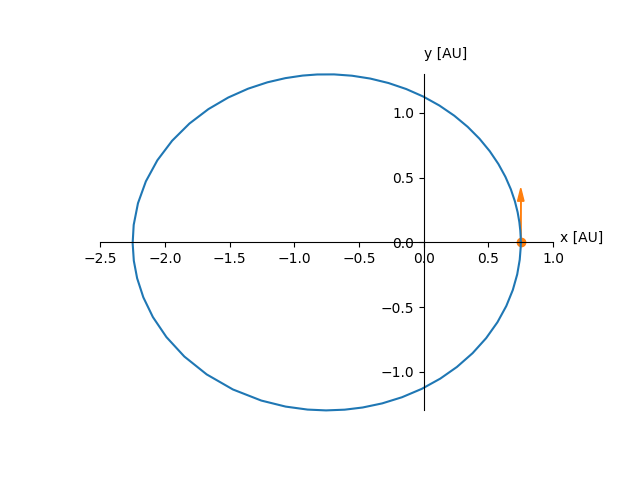

The distance of perihelion from the focus is:

$$r_p = a (1 - e)$$

where $a$ is the semi-major axis and $e$ is the eccentricity.  The perihelion velocity is all in the $y$ direction and is:

$$v_y = v_p = \sqrt{\frac{GM_\star}{a} \frac{1+e}{1-e}}$$

We'll work in units of AU, years, and solar masses, in which case, $GM_\star = 4\pi^2$ (for the Sun).  

Your initial conditions should be:

  * $x(t=0) = r_p$
  * $y(t=0) = 0$
  * $v_x(t=0) = 0$
  * $v_y(t=0) = v_p$

Use the scipy ODE integration methods to integrate an orbit and plot it

## Q6: Damped driven pendulum and chaos

There are a large class of ODE integration methods available through the `scipy.integrate.ode()` function.  Not all of them provide _dense output_ -- most will just give you the value at the end of the integration.  

The explicit Runge-Kutta integrator will give you access to the solution at intermediate points and provides methods to interpolate to any value.  You enable this via `dense_output=True`.

The damped-driven pendulum obeys the following equations:

$$\dot{\theta} = \omega$$

$$\dot{\omega} = -q \omega - \sin \theta + b \cos \omega_d t$$

here, $\theta$ is the angle of the pendulum from vertical and $\omega$ is the angular velocity.  $q$ is a damping coefficient, $b$ is a forcing amplitude, and $\omega_d$ is a driving frequency.

Choose $q = 0.5$ and $\omega_d = 2/3$.

Integrate the system for different values of $b$ (start with $b = 0.9$ and increase by $0.05$, and plot the results ($\theta$ vs. $t$).  Here's a RHS function to get you started:

In [97]:
def rhs(t, Y, q, omega_d, b):
        """ damped driven pendulum system derivatives.  Here, Y = (theta, omega) are
        the solution variables. """
        f = np.zeros_like(Y)
        
        f[0] = Y[1]
        f[1] = -q*Y[1] - np.sin(Y[0]) + b*np.cos(omega_d*t)

        return f

Note that the pendulum can flip over, giving values of $\theta$ outside of $[-\pi, \pi]$.  The following function can be used to restrict it back to $[-\pi, \pi]$ for plotting.

In [98]:
def restrict_theta(theta):
    """ convert theta to be restricted to lie between -pi and pi"""
    tnew = theta + np.pi
    tnew += -2.0*np.pi*np.floor(tnew/(2.0*np.pi))
    tnew -= np.pi
    return tnew

Write a function that takes an initial angle, $\theta_0$, and integrates the system and returns the solution.

Note, the righthand side function, `rhs`, takes additional arguments that you need to pass through the integrator.  The preferred method to do this with the `solve_ivp()` interface appears to be to use `functools.partial()`, as:
```
from functools import partial

r = solve_ivp(partial(rhs, q=q, omega_d=omega_d, b=b), ...)
```

Some values of $b$ will show very non-periodic behavior.  To see chaos, integrate two different pendula that are the same except for $\theta_0$, with only a small difference between then (like 60 degrees and 60.0001 degrees.  You'll see the solutions track for a while, but then diverge.

## Q6: Condition number

For a linear system, ${\bf A x} = {\bf b}$, we can only solve for $x$ if the determinant of the matrix ${\bf A}$ is non-zero.  If the determinant is zero, then we call the matrix _singular_.  The _condition number_ of a matrix is a measure of how close we are to being singular.  The formal definition is:

\begin{equation}
\mathrm{cond}({\bf A}) = \| {\bf A}\| \| {\bf A}^{-1} \|
\end{equation}

But we can think of it as a measure of how much ${\bf x}$ would change due to a small change in ${\bf b}$.  A large condition number means that our solution for ${\bf x}$ could be inaccurate.

A _Hilbert matrix_ has $H_{ij} = (i + j + 1)^{-1}$, and is known to have a large condition number.  Here's a routine to generate a Hilbert matrix (with a `for` loop, I'm a terrible programmer!) 

In [99]:
def hilbert(n):
    """ return a Hilbert matrix, H_ij = (i + j - 1)^{-1} """

    H = np.zeros((n,n), dtype=np.float64)

    for i in range(1, n+1):
        for j in range(1, n+1):
            H[i-1,j-1] = 1.0/(i + j - 1.0)
    return H

Let's solve ${\bf Hx} ={\bf b}$.  Create a linear system by picking an ${\bf x}$ and generating a ${\bf b}$ by multiplying by the matrix ${\bf H}$.  Then use the `scipy.linalg.solve()` function to recover ${\bf x}$.  Compute the error in ${\bf x}$ as a function of the size of the matrix.

You won't need a large matrix, $n \sim 13$ or so, will start showing big errors.

You can compute the condition number with `numpy.linalg.cond()`

There are methods that can do a better job with nearly-singular matrices.  Take a look at `scipy.linalg.lstsq()` for example.

In [100]:
x = np.arange(13)
A = hilbert(13)

In [101]:
b = A @ x
import scipy.linalg
x = scipy.linalg.lstsq(A, b)
x

(array([1.91061088e-07, 9.99977020e-01, 2.00067988e+00, 2.99139890e+00,
        4.05734188e+00, 4.77879350e+00, 6.50636021e+00, 6.35427275e+00,
        8.29063223e+00, 9.34808235e+00, 9.39337756e+00, 1.13575353e+01,
        1.19215481e+01]),
 array([], dtype=float64),
 12,
 array([1.81383012e+00, 3.96833076e-01, 4.90294194e-02, 4.34875507e-03,
        2.95177714e-04, 1.56237036e-05, 6.46641856e-07, 2.07632142e-08,
        5.07655182e-10, 9.14127587e-12, 1.14353211e-13, 8.87594903e-16,
        2.69165587e-18]))

## Q7: Noisy signal

A convolution is defined as:  

\begin{equation}  
  (f \star g)(t) \equiv \int_{-\infty}^{\infty} f(\tau) g(t - \tau) d\tau \tag{1}  
\end{equation}  

It is easy to compute this with FFTs, via the _convolution theorem_,  

\begin{equation}  
  \mathcal{F}\{f \star g\} = \mathcal{F}\{f\} \, \mathcal{F}\{g\} \tag{2}  
\end{equation}  

That is: the Fourier transform of the convolution of $f$ and $g$ is simply the product of the individual transforms of $f$ and $g$. This allows us to compute the convolution via multiplication in Fourier space and then take the inverse transform, $\mathcal{F}^{-1}\{\}$, to recover the convolution in real space:

\begin{equation}  
  f \star g = \mathcal{F}^{-1}\{ \mathcal{F}\{f\} \, \mathcal{F}\{g\}\} \tag{3}  
\end{equation}  

A common use of a convolution is to smooth noisy data, for example by convolving noisy data with a Gaussian. We'll do that here.


Here's some noisy data we'll work with

In [170]:
def fdata(x, L):
    A = L/10.0
    return 2*np.sin(2*np.pi*x/L) + x*(L-x)**2/L**3 * np.cos(x) + \
           5*x*(L-x)/L**2 + A/2 + 0.1*A*np.sin(13*np.pi*x/L)

N = 2048
L = 50.0
x = np.linspace(0, L, N, endpoint=False)
orig = fdata(x, L)
noisy = orig + 0.5*np.random.randn(N)

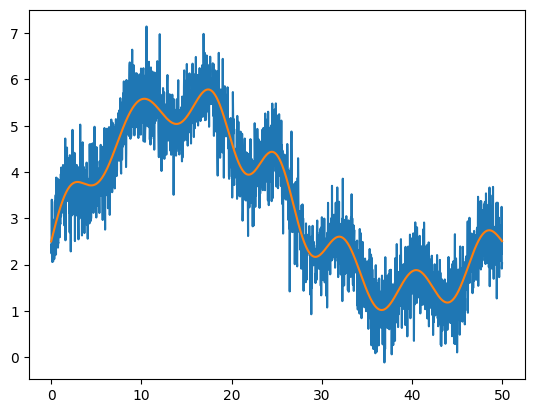

In [171]:
plt.plot(x, noisy)
plt.plot(x, orig)

SciPy provides a convolution function `scipy.signal.convolve()` that can do the convolution for us directly.  To smooth the data, we want to use a Gaussian, which can be produced by `scipy.signal.gaussian()`.

Convolve the noisy data with a Gaussian and plot the result together with the original data `orig`.  You'll need to play with the width of the Gaussian to get a nice smoothing.  You also will need to normalize the Gaussian so that it sums to 1, otherwise, your convolved data will be shifted verfically from the original function.

## Q8: FFT of the chaotic pendulum

In Q6 we looked at ODEs and the chaotic pendulum, and were interested in writing a method to integrate the pendulum in time.

Here we want to examine its behavior in frequency space.  The code below will integrate the chaotic pendulum, while requesting that the solution be stored at points spaced with a fixed dt, which makes it suitable for taking the FFT.

In [102]:
from functools import partial
from scipy.integrate import solve_ivp

def rhs(t, Y, q, omega_d, b):
    """ damped driven pendulum system derivatives.  Here, Y = (theta, omega) are
        the solution variables. """
    f = np.zeros_like(Y)
        
    f[0] = Y[1]
    f[1] = -q*Y[1] - np.sin(Y[0]) + b*np.cos(omega_d*t)

    return f

def restrict_theta(theta):
    """ convert theta to be restricted to lie between -pi and pi"""
    tnew = theta + np.pi
    tnew += -2.0*np.pi*np.floor(tnew/(2.0*np.pi))
    tnew -= np.pi
    return tnew

def int_pendulum(theta0, q, omega_d, b, tend, dt):
    """ integrate the pendulum and return solution with dt"""

    # points in time where we'll request the solution
    tpoints = np.arange(0.0, tend, dt)
    
    r = solve_ivp(partial(rhs, q=q, omega_d=omega_d, b=b),
                  [0.0, tend], [theta0, 0.0],
                  method='RK45', t_eval=tpoints)

    return r.t, r.y

The call below will give an undamped pendulum.  For a small amplitude, since we have $L = g$ in our pendulum, the period is simply $T = 2\pi$, and the frequency is $\nu_k = 1/(2\pi)$.  We plot things in terms of angular frequency, $\omega_k = 2\pi \nu_k$, so all the power will be at $\omega_k = 1$.

In [103]:
t, y = int_pendulum(np.radians(10), 0.0, 0.6666, 0.0, 200.0, 0.1)

Your task is to complete the power spectrum routine below to calculate the FFT of theta and plot it.  Experiment with the damping and driving parameters to see the complexity of the pendulum in frequency space when it becomes chaotic.  For reference, here's a plot of the solution theta

Text(0, 0.5, '$\\theta$')

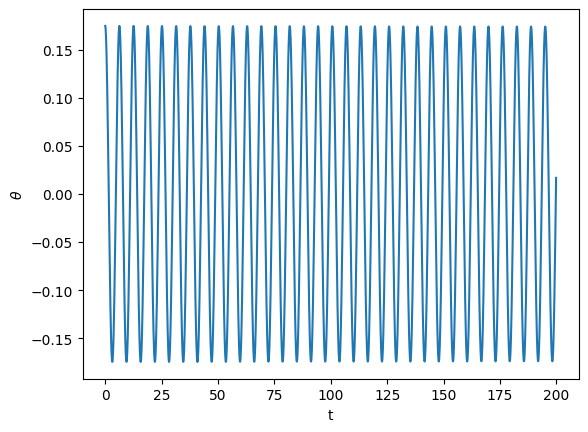

In [104]:
plt.plot(t, restrict_theta(y[0,:]))
plt.xlabel("t")
plt.ylabel(r"$\theta$")

In [105]:
def power_spectrum(t, theta0):
    """ return the power spectrum of theta.  For the frequency
        component, return it in terms of omega """

    theta = restrict_theta(theta0)
    
    # fill in the rest -- take the FFT of theta and return omega_k and 
    # the transform of theta
